---------------------------------------------------------------------------------------------------------------------------
This tutorial relies on the example model provided by `dinsar`, which is built from real public datasets belonging to a small area near the Doñana National Park (southern Spain). The model can be accessed directly through  `dinsar.example.get_model()` and the relative paths to the data, through `dinsar.example.get_path()`.
For more information about the data sources, see the file *Data Sources.txt*, located in the same folder as this tutorial.

Fore **more information** about the use of any function, method, class o moduel, use `help` bult-in (or `?`) to acces its documentation:

`>>> help(dinsar.parts)` or press the **tabulator** key in Jupyter Notebook to access an object's methods.

---------------------------------------------------------------------------------------------------------------------------

<h1><center>Studying an Aggregate</center></h1>

Tal y como se explicó en el tutorial *Creating a dinsar Model*, el modelo contiene un capa con agregados, que representan las áreas donde se analizará la deformación del terreno en combinación con otras variables. El estudio de cada uno de ellos se realiza a través de la función `agregado`, la cual exige indicar el agregado en cuestión a estudiar y, de manera opcional, si se quiere manejar únicamente la componente vertical del movimiento del terreno (`vm=True`) en los datasets DInSAR o según la dirección del LOS (Line Of Sigh).

En el siguiente ejemplo se analiza el agregado *2*, creándose un objeto de tipo `Agregado` con información relativa a la extensión que abarca.

In [2]:
import dinsar

Doñana = dinsar.example.get_model()

A2 = Doñana.agregado('2', vm=True)

Geometría añadida correctamente.
Geometría añadida correctamente.


## Sensors vinculation

Si el modelo contiene una base de piezometría y de precipitación con información espacial, la definición de un agregado supone la **vinculación automática** al mismo del piezómetro y estación pluviométrica más cercanas. Para el agregado analizado, estos sensores se pueden modificar a través del método `set_piezo` y `set_estación`, así como añadir otro de otra base de datos mediante `set_other_bd`. Estos métodos permiten vincular un sensor al agregado de **tres formas posibles**:

**1.** Vinculación del sensor **más cercano**. Way = `nearest`

**2.** Vinculación de los sensores más cercanos en un **radio** (`radius`, in Km) a la redonda (way=`radius`). Disponible para bases de datos de tipo `Piezometria` y `DataBase`.

**3.** Vinculación **manual** del sensor. Way = `manual`.

En el caso de las estaciones de preciptación, los valores asociados se corresponden con la desviación acumulada. Esto se puede elegir a través del argumento `values`
Puesto que estos métodos devuleven al propio objeto, se pueden encadenar en la misma línea de código.

In [12]:
A2.set_piezo(way='nearest').set_estacion(way='manual', estacion='Almonte')

1 piezo(s) fijado(s) según el método 'nearest'.
Fijada la estación: Almontesegún el método 'manual'.


Se puede acceder a las **series temporales** vinculadas de las bases de datos de piezometría, precipitación u otro tipo a través de los métodos `piezos`, `estacion` y `other_sensors`, respectivamente.

## Aggregate visualization

Toda esta información vinculada al agregado, así como las curvas de deformación de los datasets del agreagdo se puede **visualizar** a través del método `plot`. La **representación espacial** de todas las entidades del agregado se puede realizar a través del método `mapa`.

<AxesSubplot:title={'center':'Agregado 2'}, ylabel='Deformación (cm)'>

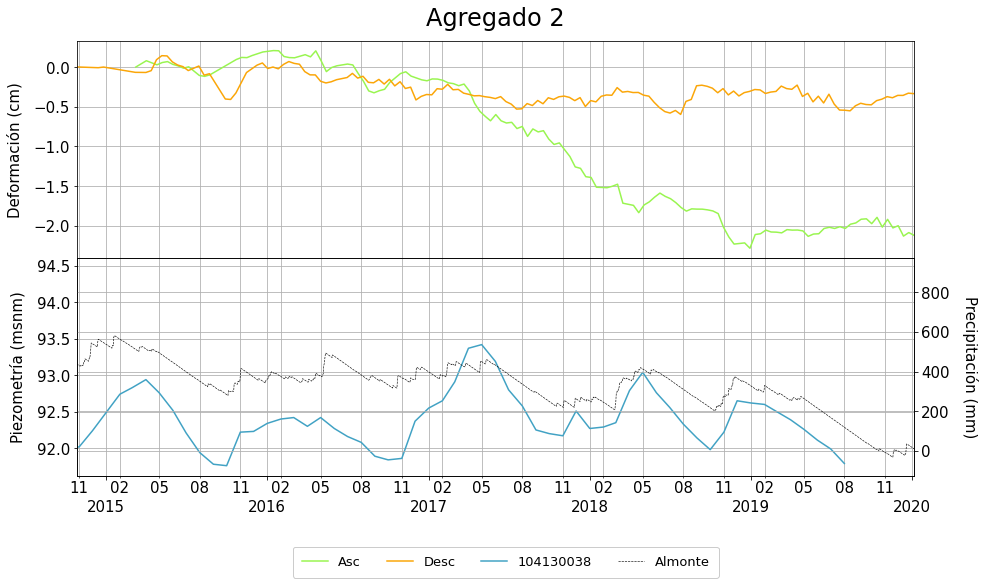

In [13]:
A2.plot()

In [14]:
A2.mapa()

## Other `Agregado` object methods

Este objeto también contiene otros métodos que permiten conocer los **datasets** que contiene el agregado (`datasets`), el **área** que abarca (in ha; `area`), las coordenadas de su centroide (`centroid`) o si los valores de deformación son los originales (según la dirección del LOS) o se corresponden únicamente con la **componente vertical** (`vm`). Asimismo, se puede imprmir en pantalla toda la información del mismo a través del método `info`.

Entre las funcionalidades del agregado destacan las funciones `subset` y `wavelet`. La primera permite acceder a uno de los datasets presentes en el agregado, devolviendo una copia del `Dataset` del modelo, pero con su información recortada a la extensión del agregado. Esta operación se explica mejor en el tutorial *Working with model parts*.

### Wavelet tools

The second function (`wavelet`) proporciona un análisis espectral de las variables del mismo mediante herramientas wavelet.
Dado que este función se ejecuta con el paquete [WaveletComp](http://www.hs-stat.com/projects/WaveletComp/WaveletComp_guided_tour.pdf), de R, hay que tener instalado el paquete `rpy2`, así como el lenguaje de programación *R*, aunque este último suele ser instalado en la instalación del primero.


Puesto que el análisis requiere que la serie temporal a estudiar presente un intervalo de muesetreo regular y una frecuencia determinada, el primer argumento de esta función es la frecuencia de muestreo, introducida como una cadena de texto según las [especificaciónes](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects) de la librería `pandas`.

El siguiente argumento de esta función es el nombre de la serie temporal a analizar. Si se introduce únicamente una, se realizará la Continous Wavelet Transform (CWT), mientras que si se introducen dos se realizarán la Cross Wavelet Transform (XWT) y la Wavelet Transform Coherence (WTC). Puedes encontrar una buena explicación de estas transformaciones, así como el caso de estudio del Acuífero Terciario y Detrítico de Madrid (TDAM) en [este enlace](http://rua.ua.es/dspace/handle/10045/106009).

La variable del agregado que se quiere introducir se puede indicar siguiendo el siguiente mapa:

- Name of some datasets:  check A2.datasets
- `'piezo'`:  analyze A2 piezometer

- `'precipi'`: analyze A2 piezometer

- `'other_sensors'`: analyze a sensor from other database.

También se puede introducir una pandas Series o DataFrame para el análisis de una serie temporal externa.

Cuando se introducen dos series temporales, el **orden** de su introducción es importante de cara a la identificación de relaciones de causa y efecto.

En los `**kwargs` de la función se han de definir las variables que entran en juego. Un correcto análisis requiere de una minuciosa configuración estos parámetros de partida. Es muy recomendable antes consultar las [opciones disponibles](https://cran.r-project.org/web/packages/WaveletComp/WaveletComp.pdf) y sus funcionalidades.

A contniuación se ilustra este análisis con dos ejemplos:

#### **1.** Estudio de las periodicidades principales del dataset 'Asc' del agregado 2, para una frecuencia mensual.

In [ ]:
A2.wavelet('M','Asc','piezo')

#### **2.** Análisis de las periodicidades comunes entre el la deformación promedio del agregado 2 (para el dataset 'Asc') y el piezómeetro vinculado a él, para una frecuencia de muestreo mensual.

In [ ]:
W = A2.wavelet('M','Asc','piezo')

Este análisis devuelve un objeto wavelet, el cual contiene tres métodos útiles:

`W.image`         Obtención de las figuras resultantes.

`W.used_params`   Consulta de los parámetros del análisis.

`W.legend`     Consulta de la nomenclatura de la imagen obtenida.

También es posible **analizar conjuntamente varios agregados** si se introducen como `*args` en la función `Doñana.agregado`. En este caso el área de análisis es el área conjunta de los agregados introducidos, siendo su centroide el centroide del polígono múltiple que forman.

Además, si todas la funcionalidades comentadas en este tutorial se quieren **ejecutar automáticamente** (guardando los datos generados de cada agregado en una carpeta), se puede realizar a través del método `porLotes`, del Modelo.